In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (3).zip


In [82]:
!unzip archive.zip

Archive:  archive.zip
replace german_credit_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [84]:
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [85]:
df["Age"].describe()

,Age
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000


In [86]:
df["Risk"].value_counts()

,count
Risk,
good,700
bad,300


In [87]:
df.shape

(1000, 11)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [89]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df["Job"].unique()

array([2, 1, 3, 0])

In [91]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [92]:
df.duplicated().sum()

np.int64(0)

In [93]:
df = df.dropna().reset_index(drop=True)

In [94]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [95]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [96]:
df.drop( columns = 'Unnamed: 0', inplace=True )

In [97]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


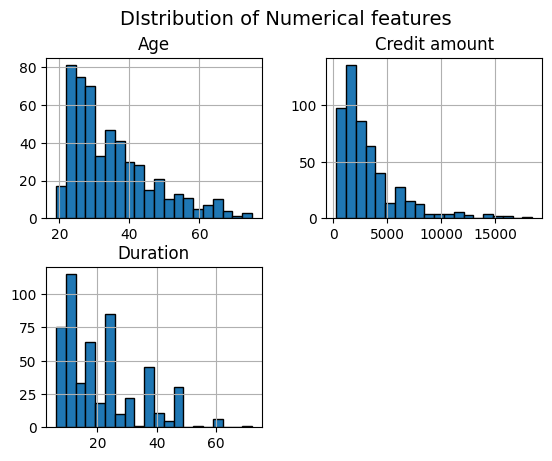

In [98]:
df[['Age','Credit amount','Duration']].hist(bins=20, edgecolor='black')
plt.suptitle('DIstribution of Numerical features', fontsize=14)
plt.show()

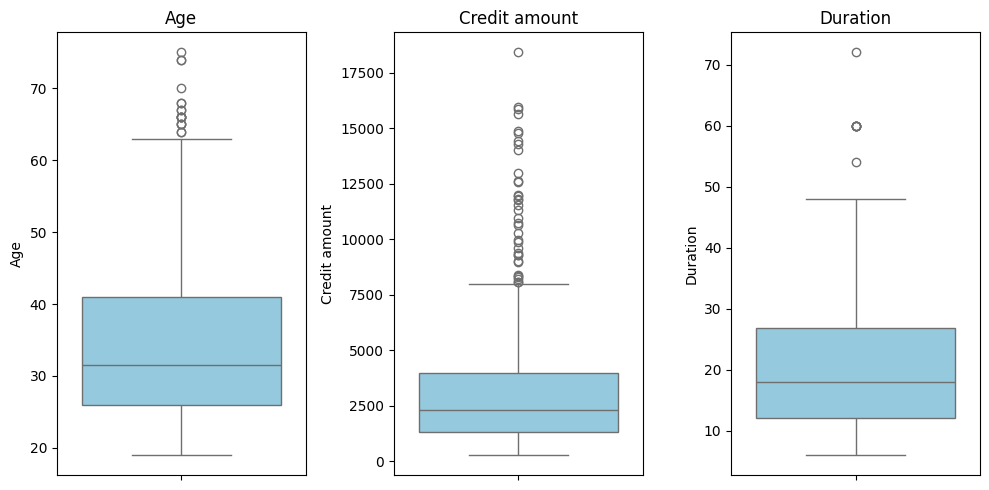

In [99]:
plt.figure(figsize=(10,5))
for i, col in enumerate (['Age','Credit amount','Duration']):
  plt.subplot(1,3,i+1)
  sns.boxplot(y=df[col],color='skyblue')
  plt.title(col)

plt.tight_layout()
plt.show()

In [100]:
df.query('Duration>=60')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [103]:
categorical_cols=['Sex','Job','Housing','Saving accounts','Checking account','Purpose','Risk']

/tmp/ipython-input-1648083701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2",order= df[col].value_counts().index)
/tmp/ipython-input-1648083701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2",order= df[col].value_counts().index)
/tmp/ipython-input-1648083701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2",order= df[col].value_counts().index)
/tmp/ipython-input-1648083701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is

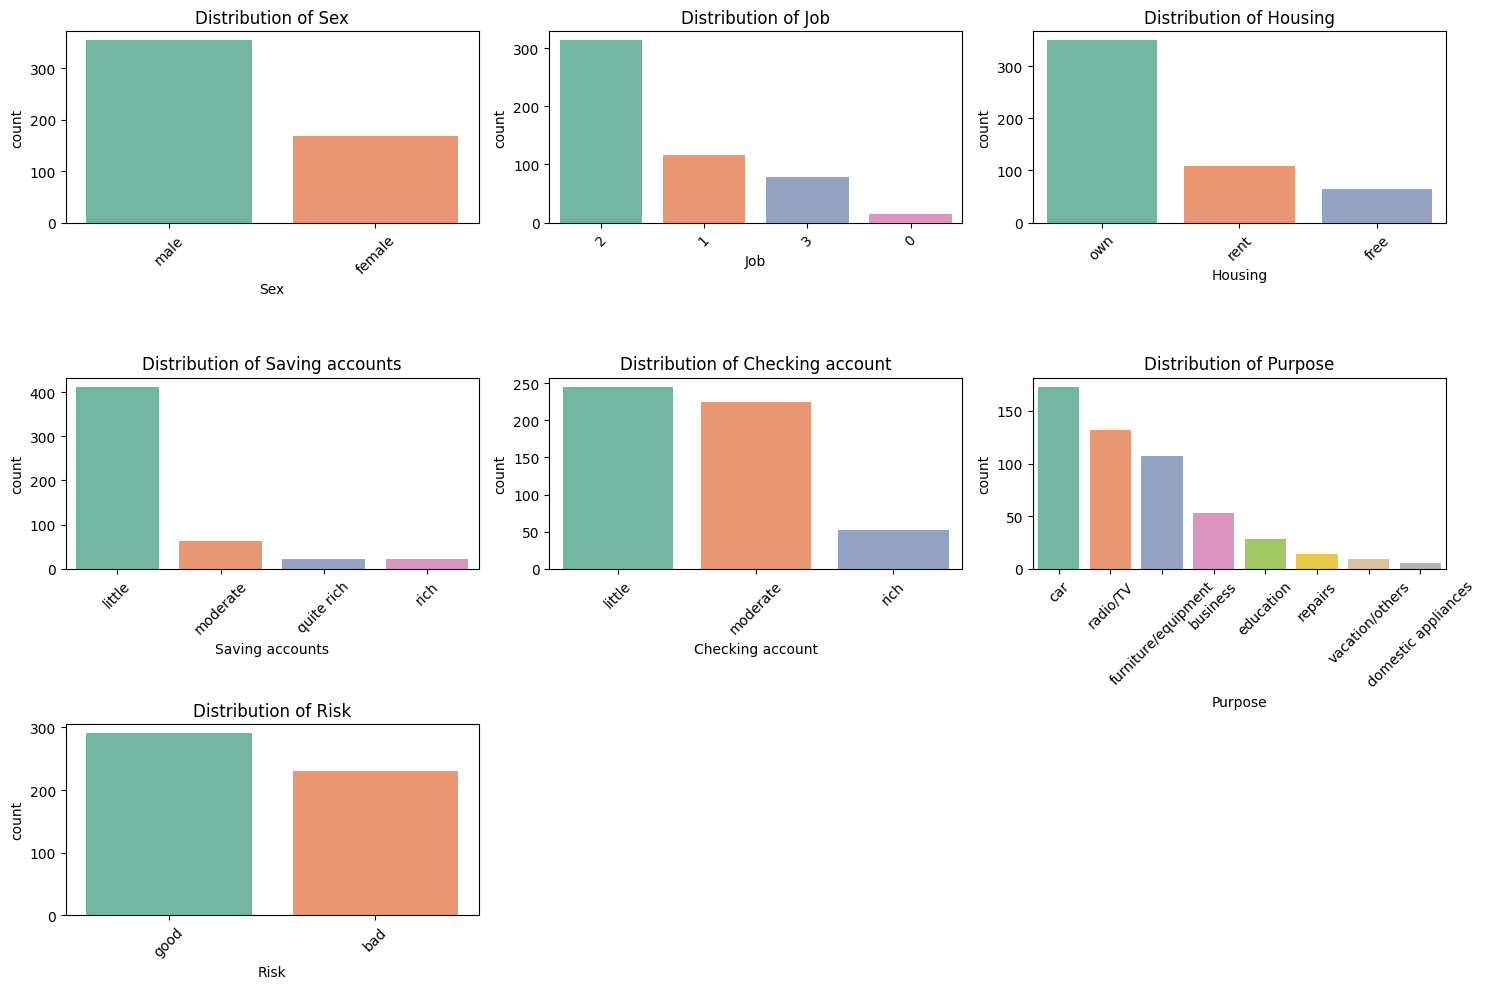

In [102]:
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3,3,i+1)
  sns.countplot(data=df,x=col,palette="Set2",order= df[col].value_counts().index)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [104]:
corr=df[["Age",'Job','Credit amount','Duration']].corr()

In [105]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


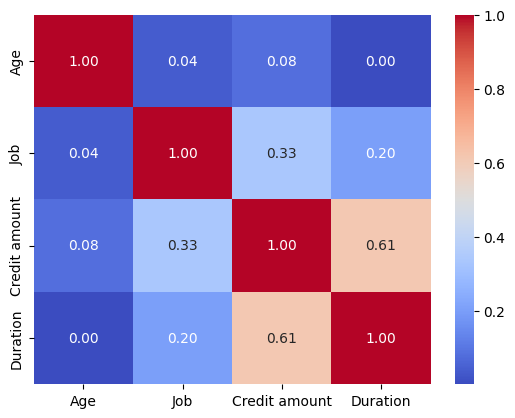

In [106]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [107]:
df.groupby("Job")["Credit amount"].mean()

,Credit amount
Job,
0,1767.857143
1,2250.715517
2,3129.130990
3,5648.784810


In [108]:
df.groupby("Sex")["Credit amount"].mean()

,Credit amount
Sex,
female,2937.202381
male,3440.833333


In [109]:
pd.pivot_table(df,values="Credit amount",index="Housing",columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


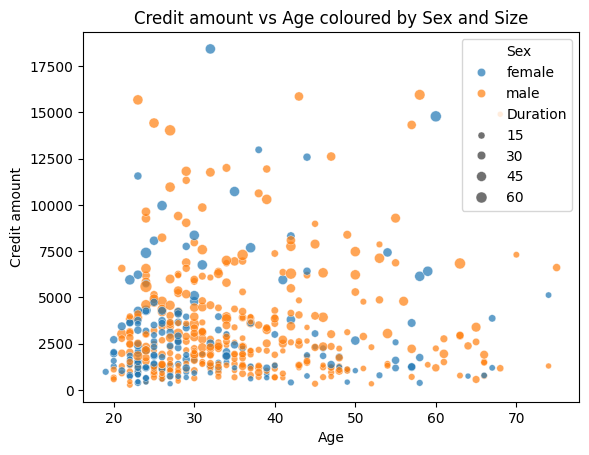

In [110]:
sns.scatterplot(data=df, x="Age",y="Credit amount",hue="Sex",size="Duration", alpha= 0.7)
plt.title("Credit amount vs Age coloured by Sex and Size")
plt.show()

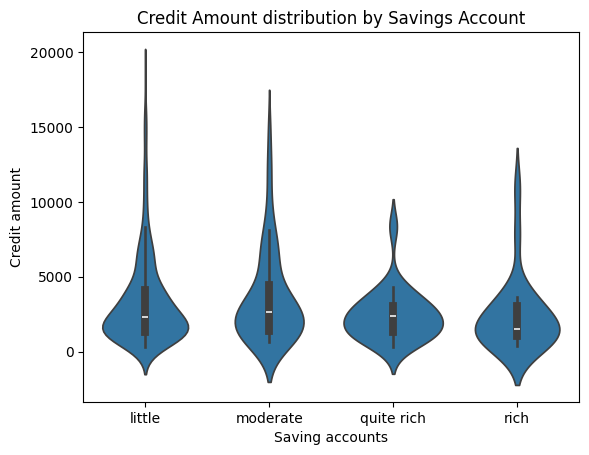

In [111]:
sns.violinplot(data=df,x="Saving accounts", y="Credit amount")
plt.title("Credit Amount distribution by Savings Account")
plt.show()

In [112]:
df["Risk"].value_counts(normalize= True)*100

,proportion
Risk,
good,55.747126
bad,44.252874


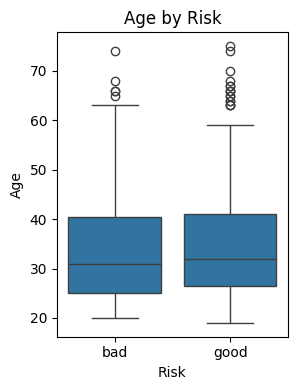

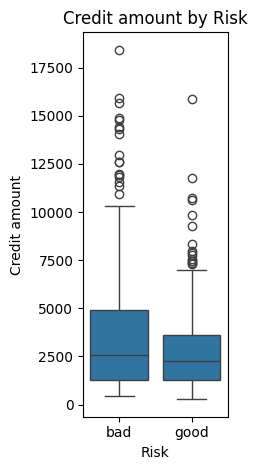

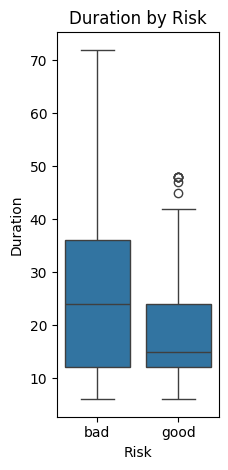

In [113]:
plt.figure(figsize=(8,4))
for i, col in enumerate(["Age","Credit amount", "Duration"]):
  plt.subplot(1,3,i+1)
  sns.boxplot(data=df, x="Risk",y= col)
  plt.title(f"{col} by Risk")

  plt.tight_layout()
  plt.show()

In [114]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [115]:
categorical_cols

['Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose',
 'Risk']

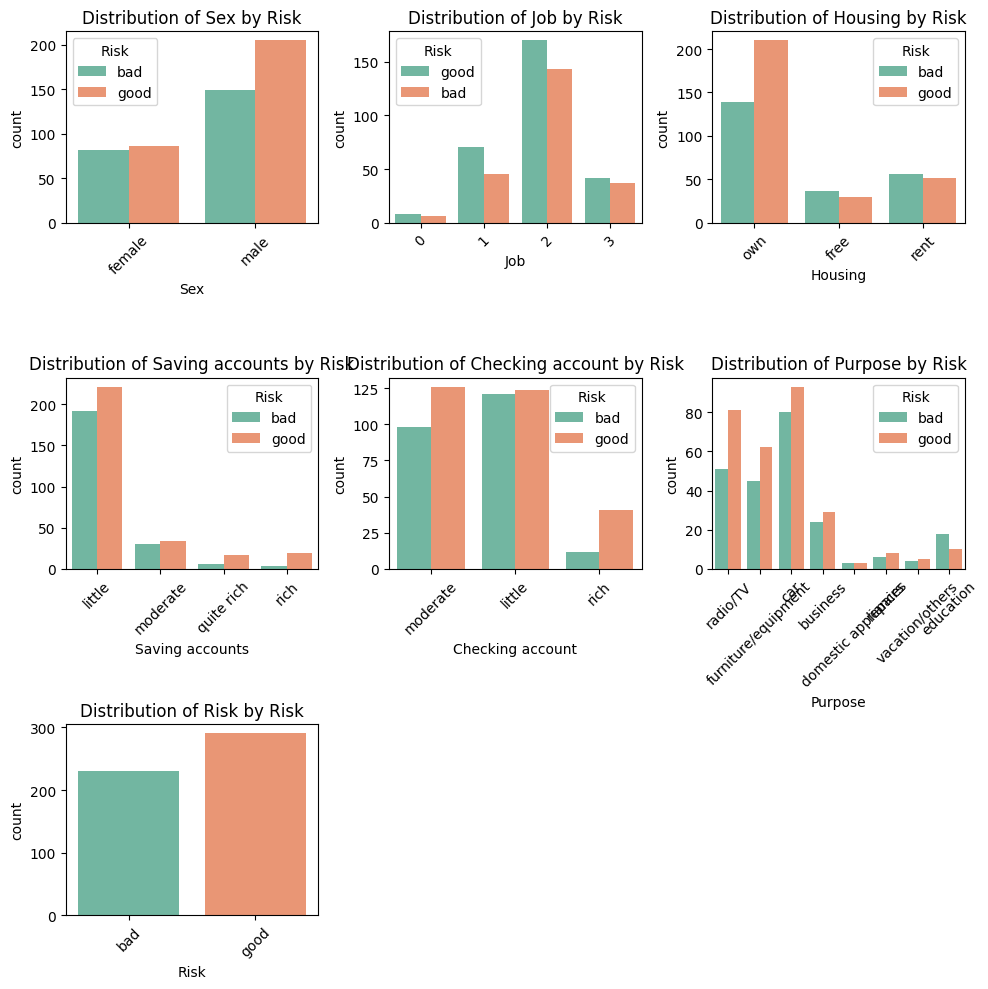

In [116]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3,3,i+1)
  sns.countplot(data=df,x= col, hue="Risk", palette="Set2")
  plt.title(f"Distribution of {col} by Risk")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [117]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [118]:
features=['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']

In [119]:
target="Risk"

In [120]:
df_model= df[features + [target]].copy()

In [121]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


In [123]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [124]:
cat_cols= df_model.select_dtypes(include="object").columns.drop("Risk")

In [125]:
le_dict= {}

In [126]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [127]:
for col in cat_cols:
  le = LabelEncoder()
  df_model[col]= le.fit_transform(df_model[col])
  le_dict[col]= le
  joblib.dump(le,f"{col}_encoder.pkl")

In [128]:
le_target= LabelEncoder()

In [129]:
target

'Risk'

In [130]:
df_model[target]= le_target.fit_transform(df_model[target])

In [131]:
df_model[target].value_counts()

,count
Risk,
1,291
0,231


In [132]:
joblib.dump(le_target, "target_encoder.pkl")


['target_encoder.pkl']

In [133]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,0,2,1,0,1,5951,48,5,0
1,45,1,2,0,0,0,7882,42,4,1
2,53,1,2,0,0,0,4870,24,1,0
3,35,1,3,2,0,1,6948,36,1,1
4,28,1,3,1,0,1,5234,30,1,0


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x=df_model.drop(target,axis=1)
y=df_model[target]

In [136]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,22,0,2,1,0,1,5951,48,5
1,45,1,2,0,0,0,7882,42,4
2,53,1,2,0,0,0,4870,24,1
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,1
...,...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24,5
518,30,1,3,1,0,0,3959,36,4
519,40,1,3,1,0,0,3857,30,1
520,23,1,2,0,0,0,1845,45,5


In [137]:
y

,Risk
0,0
1,1
2,0
3,1
4,0
...,...
517,1
518,1
519,1
520,0


In [138]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify= y)

In [139]:
x_train.shape

(417, 9)

In [140]:
x_test.shape

(105, 9)

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [151]:
def train_model(model,param_grid, x_train, y_train, x_test, y_test):
  grid= GridSearchCV(model, param_grid, cv=5, scoring="accuracy",n_jobs=-1)
  grid.fit(x_train,y_train)
  best_model= grid.best_estimator_
  y_pred= best_model.predict(x_test)
  acc= accuracy_score(y_test,y_pred)
  return best_model, acc, grid.best_params_

In [152]:
dt = DecisionTreeClassifier(random_state=1, class_weight ="balanced")
dt_param_grid = {
    "max_depth": [3,5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [153]:
best_dt,acc_dt, params_dt= train_model(dt, dt_param_grid, x_train, y_train, x_test, y_test)

In [154]:
print("Decision Tree Accuracy",acc_dt)

Decision Tree Accuracy 0.5904761904761905


In [155]:
print("Best parameters",params_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [157]:
rf= RandomForestClassifier(random_state=1, class_weight="balanced",n_jobs=-1)

In [159]:
rf_param_grid={
    "n_estimators": [100,200],
    "max_depth": [5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [161]:
best_rf,acc_rf, params_rf= train_model(rf, rf_param_grid, x_train, y_train, x_test, y_test)

In [162]:
print("Random Forest Accuracy",acc_rf)

Random Forest Accuracy 0.638095238095238


In [163]:
print("Best params", params_rf)

Best params {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [165]:
et = ExtraTreesClassifier(random_state=1, class_weight="balanced",n_jobs=-1)

In [166]:
et_param_grid={
    "n_estimators": [100,200],
    "max_depth": [5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [167]:
best_et, acc_et, params_et= train_model(et, et_param_grid, x_train, y_train, x_test, y_test)

In [168]:
print("Extra trees accuracy", acc_et)

Extra trees accuracy 0.638095238095238


In [169]:
print("Best params:", params_et)

Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [171]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train==0).sum()/(y_train==1).sum(),use_label_encoder= False,eval_metric="logloss")

In [172]:
xgb_param_grid= {
    "n_estimators": [100,200],
    "max_depth": [3,5,7,10],
    "learning_rate": [0.01,0.1,0.2],
    "subsample": [0.7,1],
    "colsample_bytree": [0.7,1]
}

In [173]:
best_xgb, acc_xgb, params_xgb= train_model(xgb, xgb_param_grid, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:57:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [175]:
print("XGB accuracy", acc_xgb)

XGB accuracy 0.6476190476190476


In [176]:
print("Best params", params_xgb)

Best params {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}


In [177]:
best_et.predict(x_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [178]:
joblib.dump(best_et,"extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [185]:
import joblib
model = joblib.load("/content/drive/MyDrive/Colab Notebooks/extra_trees_credit_model.pkl")

In [191]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [192]:
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

In [196]:
from google.colab import drive
drive.mount('/content/drive')

import joblib

# Save individual LabelEncoders using le_dict
joblib.dump(le_sex, "/content/drive/MyDrive/Colab Notebooks/Sex_encoder.pkl")
joblib.dump(le_dict['Housing'], "/content/drive/MyDrive/Colab Notebooks/Housing_encoder.pkl")
joblib.dump(le_dict['Saving accounts'], "/content/drive/MyDrive/Colab Notebooks/Saving accounts_encoder.pkl")
joblib.dump(le_dict['Checking account'], "/content/drive/MyDrive/Colab Notebooks/Checking account_encoder.pkl")
joblib.dump(le_dict['Purpose'], "/content/drive/MyDrive/Colab Notebooks/Purpose_encoder.pkl")

print("All encoders should now be saved to Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All encoders should now be saved to Google Drive.


In [198]:
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define the directory path where encoders should be
encoders_dir = '/content/drive/MyDrive/Colab Notebooks/'

# 3. Check if the directory exists
if not os.path.exists(encoders_dir):
    print(f"Error: Directory '{encoders_dir}' does not exist. Please check the path or ensure the files were saved there.")
else:
    print(f"Directory '{encoders_dir}' exists.")
    # 4. Check if the encoder files exist within the directory
    expected_files = ['Sex_encoder.pkl', 'Housing_encoder.pkl', 'Saving accounts_encoder.pkl', 'Checking account_encoder.pkl', 'Purpose_encoder.pkl']
    all_files_exist = True
    for filename in expected_files:
        file_path = os.path.join(encoders_dir, filename)
        if not os.path.exists(file_path):
            print(f"Error: File '{filename}' not found at '{file_path}'.")
            all_files_exist = False
        else:
            print(f"File '{filename}' found.")

    if all_files_exist:
        print("All encoder files are present. You should now be able to load them with your original code.")
        import joblib
        encoders = {col: joblib.load(os.path.join(encoders_dir, f"{col}_encoder.pkl"))
                    for col in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']}
        print("Encoders loaded successfully!")
    else:
        print("Some encoder files are missing. Please ensure all necessary files are in the correct directory.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory '/content/drive/MyDrive/Colab Notebooks/' exists.
File 'Sex_encoder.pkl' found.
File 'Housing_encoder.pkl' found.
File 'Saving accounts_encoder.pkl' found.
File 'Checking account_encoder.pkl' found.
File 'Purpose_encoder.pkl' found.
All encoder files are present. You should now be able to load them with your original code.
Encoders loaded successfully!
